In [1]:
import mplfinance as mpf
import requests
import pandas as pd
import re
import time


import plotly.graph_objects as go
import plotly.subplots as ms
import talib
import matplotlib.pyplot as plt     # 점찍기용


import matplotlib.pyplot as plt    # 히트맵용
import seaborn as sns              # 히트맵용
import numpy as np
from pandas import Series, DataFrame

In [2]:
test1 = pd.read_csv('003100.KQ.csv', encoding='cp949')
test1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,18600.0,18750.0,18450.0,18750.0,18699.246094,6861.0
1,2018-01-03,18800.0,18800.0,18550.0,18550.0,18499.787109,3203.0
2,2018-01-04,18600.0,18800.0,18500.0,18550.0,18499.787109,4183.0
3,2018-01-05,18500.0,18650.0,18500.0,18550.0,18499.787109,8591.0
4,2018-01-08,18600.0,18650.0,18100.0,18400.0,18350.193359,7477.0
...,...,...,...,...,...,...,...
1307,2023-04-24,167700.0,169000.0,117400.0,117400.0,117400.000000,26583.0
1308,2023-04-25,82200.0,82200.0,82200.0,82200.0,82200.000000,10327.0
1309,2023-04-26,57600.0,57600.0,57600.0,57600.0,57600.000000,25214.0
1310,2023-04-27,40400.0,40400.0,40400.0,40400.0,40400.000000,389586.0


In [3]:
# date, close, volume만 남기기

test1 = test1[['Date', 'Close', 'Volume']]
test1

,Date,Close,Volume
0,2018-01-02,18750.0,6861.0
1,2018-01-03,18550.0,3203.0
2,2018-01-04,18550.0,4183.0
3,2018-01-05,18550.0,8591.0
4,2018-01-08,18400.0,7477.0
...,...,...,...
1307,2023-04-24,117400.0,26583.0
1308,2023-04-25,82200.0,10327.0
1309,2023-04-26,57600.0,25214.0
1310,2023-04-27,40400.0,389586.0


In [4]:
test2 = pd.read_csv('게시글_003100.csv', encoding='cp949')
test2

,날짜,게시글
0,2017-06-22,4
1,2017-06-23,1
2,2017-06-25,1
3,2017-06-26,1
4,2017-06-27,1
...,...,...
975,2023-04-27,577
976,2023-04-28,1094
977,2023-04-29,140
978,2023-04-30,95


In [5]:
test1.index = pd.DatetimeIndex(test1['Date'])
test1

,Date,Close,Volume
Date,,,
2018-01-02,2018-01-02,18750.0,6861.0
2018-01-03,2018-01-03,18550.0,3203.0
2018-01-04,2018-01-04,18550.0,4183.0
2018-01-05,2018-01-05,18550.0,8591.0
2018-01-08,2018-01-08,18400.0,7477.0
...,...,...,...
2023-04-24,2023-04-24,117400.0,26583.0
2023-04-25,2023-04-25,82200.0,10327.0
2023-04-26,2023-04-26,57600.0,25214.0


In [6]:
test2.index = pd.DatetimeIndex(test2['날짜'])
test2

,날짜,게시글
날짜,,
2017-06-22,2017-06-22,4
2017-06-23,2017-06-23,1
2017-06-25,2017-06-25,1
2017-06-26,2017-06-26,1
2017-06-27,2017-06-27,1
...,...,...
2023-04-27,2023-04-27,577
2023-04-28,2023-04-28,1094
2023-04-29,2023-04-29,140


In [7]:
# https://ddaaadd.tistory.com/154

m = test1.join(test2)

m

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,18750.0,6861.0,NaN,NaN
2018-01-03,2018-01-03,18550.0,3203.0,NaN,NaN
2018-01-04,2018-01-04,18550.0,4183.0,NaN,NaN
2018-01-05,2018-01-05,18550.0,8591.0,2018-01-05,1.0
2018-01-08,2018-01-08,18400.0,7477.0,NaN,NaN
...,...,...,...,...,...
2023-04-24,2023-04-24,117400.0,26583.0,2023-04-24,210.0
2023-04-25,2023-04-25,82200.0,10327.0,2023-04-25,350.0
2023-04-26,2023-04-26,57600.0,25214.0,2023-04-26,495.0


In [8]:
m.head(20)

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,18750.0,6861.0,NaN,NaN
2018-01-03,2018-01-03,18550.0,3203.0,NaN,NaN
2018-01-04,2018-01-04,18550.0,4183.0,NaN,NaN
2018-01-05,2018-01-05,18550.0,8591.0,2018-01-05,1.0
2018-01-08,2018-01-08,18400.0,7477.0,NaN,NaN
2018-01-09,2018-01-09,18400.0,10055.0,2018-01-09,2.0
2018-01-10,2018-01-10,18250.0,1975.0,2018-01-10,1.0
2018-01-11,2018-01-11,18150.0,9966.0,NaN,NaN
2018-01-12,2018-01-12,18200.0,12608.0,2018-01-12,2.0


In [9]:
m = m.rename(columns={'날짜': 'naver_date', '게시글': 'Post'})

In [10]:
heatmap_data = m[["Close", "Volume", "Post"]]

<Axes: title={'center': '003100.KQ'}>

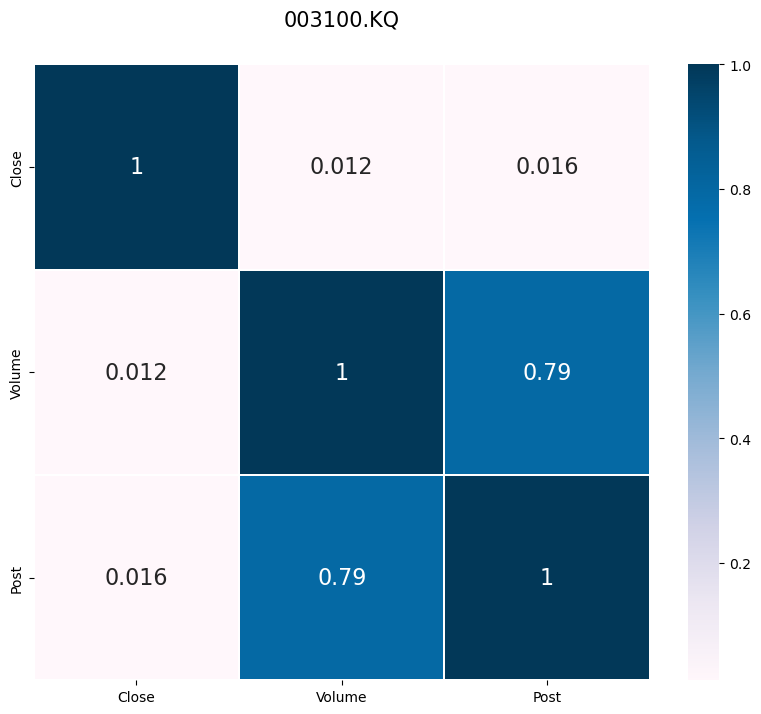

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("003100.KQ", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})